# Import modules

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Import data

Import the dataset `sf_trees_clean` that we cleaned earlier.  
You can also access the data from this google drive link: https://drive.google.com/file/d/19-uOnFkT3FF2Qbfirq6Wbrigsuk0VoWF/view?usp=share_link

In [2]:
# Import cleaned dataset

sf_trees = pd.read_csv('sf_trees_clean.csv', 
    dtype={'treeid': object, '_day': 'Int64', '_month': 'Int64', '_year': 'Int64' 
    },
    parse_dates= ['plantdate']
)

In [3]:
# check if Dtype is right for each column

sf_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196590 entries, 0 to 196589
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   treeid                     196590 non-null  object        
 1   qlegalstatus               196533 non-null  object        
 2   qspecies                   196590 non-null  object        
 3   qaddress                   195097 non-null  object        
 4   siteorder                  194796 non-null  float64       
 5   qsiteinfo                  196590 non-null  object        
 6   planttype                  196590 non-null  object        
 7   qcaretaker                 196590 non-null  object        
 8   qcareassistant             24707 non-null   object        
 9   plantdate                  70878 non-null   datetime64[ns]
 10  dbh                        153021 non-null  float64       
 11  plotsize                   146229 non-null  object  

In [ ]:
sf_trees

# Q1: In which year are most trees planted?   
To answer this question, we need to group and summarize the dataset by year. 

**An important note: only 70878 out of 196590 trees contain the `plantdate` data**, so when doing this analysis, we are limited to about 36% of the data points. 

In [4]:
sf_trees.groupby(['_year']).count()

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,plantdate,...,latitude,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month
_year,,,,,,,,,,,,,,,,,,,,,
1955,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
1956,168,168,168,162,168,168,168,168,0,168,...,161,161,161,161,161,161,161,161,168,168
1969,333,333,333,333,333,333,333,333,0,333,...,330,330,330,330,330,330,330,330,333,333
1970,72,72,72,72,72,72,72,72,0,72,...,71,71,71,71,71,71,71,71,72,72
1971,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1972,1467,1467,1467,1467,1467,1467,1467,1467,2,1467,...,1447,1447,1447,1447,1447,1447,1447,1447,1467,1467
1973,731,731,731,731,731,731,731,731,0,731,...,721,721,721,721,721,721,721,721,731,731
1974,394,394,394,394,394,394,394,394,0,394,...,391,391,391,391,391,391,391,391,394,394
1975,68,68,68,67,68,68,68,68,0,68,...,67,67,67,67,67,67,67,67,68,68


Looks like we are missing data from 1957-1968. Also, we only have 1 tree planted in 1971, which shows we might have a problem in that year too. But it's okay. I'm going to to subset to more recent years, let's say 2000-2021.   

In [5]:
# subset data to 2000-2021

sf_trees2000 = sf_trees[
    (sf_trees['plantdate'] >= '2000-01-01') &
    (sf_trees['plantdate'] < '2022-01-01')
    ].reset_index(drop=True)
sf_trees2000

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,plantdate,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
0,217365,Section 806 (d),Ceanothus 'Ray Hartman' :: California Lilac 'R...,707 Rockdale Dr,1.0,Sidewalk: Property side : Yard,Tree,Private,NaN,2021-10-14,...,-122.451285,"(37.74120925101712, -122.45128526411095)",9.0,7.0,4.0,59.0,40.0,3,10,2021
1,92771,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,11X Blanken Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-10-14,...,-122.401320,"(37.712246915438215, -122.40132023435935)",10.0,3.0,8.0,309.0,1.0,3,10,2021
2,243397,Section 806 (d),Jacaranda mimosifolia :: Jacaranda,253 Chattanooga St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-10-15,...,-122.426337,"(37.75252386720633, -122.42633719012191)",2.0,4.0,5.0,28862.0,22.0,4,10,2021
3,259361,DPW Maintained,Laurus nobilis :: Sweet Bay: Grecian Laurel,1699x Keith St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,FUF,2021-10-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,2021
4,264797,Undocumented,Jacaranda mimosifolia :: Jacaranda,685 Dwight St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2020-10-13,...,-122.408705,"(37.72219213738862, -122.40870548174003)",10.0,3.0,7.0,309.0,28.0,1,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40768,81695,DPW Maintained,Podocarpus gracilor :: Fern Pine,539 17th Ave,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2009-07-09,...,-122.476053,"(37.777811568768506, -122.47605276707777)",11.0,6.0,2.0,55.0,26.0,3,7,2009
40769,253343,Planning Code 138.1 required,Pittosporum undulatum :: Victorian Box,3999 Sacramento St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2017-08-23,...,-122.459037,"(37.78647957561907, -122.45903650182363)",11.0,6.0,1.0,54.0,31.0,2,8,2017
40770,86477,DPW Maintained,Arbutus 'Marina' :: Hybrid Strawberry Tree,1754 27th Ave,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,2006-12-28,...,-122.485020,"(37.75473729530901, -122.48501975585695)",1.0,8.0,3.0,56.0,35.0,3,12,2006
40771,183327,DPW Maintained,Metrosideros excelsa :: New Zealand Xmas Tree,4619 Lincoln Way,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2012-11-02,...,-122.507680,"(37.76400978066716, -122.50767960917241)",1.0,8.0,3.0,56.0,35.0,4,11,2012


Check where the trees are planted: sidewalk, private property, or in parks? 

In [6]:
# look at the unique 'siteinfo' of trees

sf_trees['qsiteinfo'].unique()

array(['Sidewalk: Property side : Yard', 'Sidewalk: Curb side : Cutout',
       'Median : Cutout', 'Sidewalk: Curb side : Yard',
       'Front Yard : Yard', ':', 'Front Yard : Cutout',
       'Sidewalk: Property side : Cutout', 'Sidewalk: Curb side : Pot',
       'Back Yard : Yard', 'Unaccepted Street : Yard', 'Side Yard : Yard',
       'Side Yard : Cutout', 'Sidewalk: Property side : Pot',
       'Median : Yard', 'Unaccepted Street : Cutout',
       'Unaccepted Street : Pot', ': Yard', 'unknown : Cutout',
       'Side Yard : Pot', 'Sidewalk: Curb side :', 'Front Yard :',
       'unknown : Yard', 'Back Yard : Cutout', 'Median :',
       'Sidewalk: Property side :', ': Cutout', 'Hanging basket : Cutout',
       'Front Yard : Pot', 'Sidewalk: Curb side : Hanging Pot',
       'Hanging basket : Yard', 'unknown : Pot', 'Median : Hanging Pot'],
      dtype=object)

This is a little hard to read. 

In [7]:
site_info = pd.Series(['Sidewalk: Property side : Yard', 'Sidewalk: Curb side : Cutout',
       'Median : Cutout', 'Sidewalk: Curb side : Yard',
       'Front Yard : Yard', ':', 'Front Yard : Cutout',
       'Sidewalk: Property side : Cutout', 'Sidewalk: Curb side : Pot',
       'Back Yard : Yard', 'Unaccepted Street : Yard', 'Side Yard : Yard',
       'Side Yard : Cutout', 'Sidewalk: Property side : Pot',
       'Median : Yard', 'Unaccepted Street : Cutout',
       'Unaccepted Street : Pot', ': Yard', 'unknown : Cutout',
       'Side Yard : Pot', 'Sidewalk: Curb side :', 'Front Yard :',
       'unknown : Yard', 'Back Yard : Cutout', 'Median :',
       'Sidewalk: Property side :', ': Cutout', 'Hanging basket : Cutout',
       'Front Yard : Pot', 'Sidewalk: Curb side : Hanging Pot',
       'Hanging basket : Yard', 'unknown : Pot', 'Median : Hanging Pot'])
site_info

0        Sidewalk: Property side : Yard
1          Sidewalk: Curb side : Cutout
2                       Median : Cutout
3            Sidewalk: Curb side : Yard
4                     Front Yard : Yard
5                                     :
6                   Front Yard : Cutout
7      Sidewalk: Property side : Cutout
8             Sidewalk: Curb side : Pot
9                      Back Yard : Yard
10             Unaccepted Street : Yard
11                     Side Yard : Yard
12                   Side Yard : Cutout
13        Sidewalk: Property side : Pot
14                        Median : Yard
15           Unaccepted Street : Cutout
16              Unaccepted Street : Pot
17                               : Yard
18                     unknown : Cutout
19                      Side Yard : Pot
20                Sidewalk: Curb side :
21                         Front Yard :
22                       unknown : Yard
23                   Back Yard : Cutout
24                             Median :


In [8]:
# count how many trees are planted on the sidewalk

sf_trees.groupby(['qsiteinfo']).count().sort_values(by='treeid', ascending=False)

,treeid,qlegalstatus,qspecies,qaddress,siteorder,planttype,qcaretaker,qcareassistant,plantdate,dbh,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
qsiteinfo,,,,,,,,,,,,,,,,,,,,,
Sidewalk: Curb side : Cutout,154895,154851,154895,153423,153552,154895,154895,24365,67419,116129,...,152142,152142,152120,152104,152136,152142,152132,67419,67419,67419
Sidewalk: Property side : Yard,11218,11216,11218,11218,11159,11218,11218,12,364,10482,...,11154,11154,11150,11154,11153,11154,11153,364,364,364
Sidewalk: Curb side : Yard,9211,9210,9211,9211,9194,9211,9211,12,311,9031,...,9210,9210,9207,9207,9210,9210,9210,311,311,311
Median : Cutout,4918,4913,4918,4917,4908,4918,4918,10,1224,4332,...,4899,4899,4769,4769,4769,4769,4769,1224,1224,1224
:,4902,4900,4902,4902,4894,4902,4902,7,93,4898,...,4902,4902,4896,4902,4902,4900,4902,93,93,93
Front Yard : Yard,3337,3337,3337,3334,3246,3337,3337,27,394,2424,...,3308,3308,3240,3285,3308,3308,3308,394,394,394
Median : Yard,1732,1732,1732,1732,1731,1732,1732,7,38,1453,...,1719,1719,1719,1716,1719,1719,1719,38,38,38
Sidewalk: Curb side : Pot,1697,1697,1697,1697,1696,1697,1697,5,93,1607,...,1696,1696,1696,1696,1696,1696,1696,93,93,93
Sidewalk: Property side : Cutout,1641,1641,1641,1641,1518,1641,1641,183,553,667,...,1623,1623,1623,1623,1623,1623,1623,553,553,553


It seems the majority of the trees in our dataset are planted on the sidewalk. But there are other terms here that I'm quite sure about. For exmaple, does "unknown : Yard" mean it's in someone else's yard? What does "Unaccepted Street : Cutout" mean? 

**Should I only consider trees that are on the sidewalk?** But for now, I will still go ahead and use the entire dataset to continue my analysis. 

In [9]:
# sort data frame by year
sf_trees2000 = sf_trees2000.sort_values(by=['_year']).reset_index(drop=True)
sf_trees2000

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,plantdate,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
0,43373,Permitted Site,Pittosporum undulatum :: Victorian Box,410 Diamond St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,FUF,2000-07-17,...,-122.436815,"(37.755758364615325, -122.43681521058268)",2.0,4.0,5.0,28862.0,22.0,0,7,2000
1,43530,Permitted Site,Rhaphiolepis Majestic Beauty :: Indian Hawthor...,1860 Hayes St,6.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2000-07-19,...,-122.447072,"(37.77388319132388, -122.44707246686755)",15.0,5.0,11.0,29492.0,16.0,2,7,2000
2,43635,Permitted Site,Olea europaea :: Olive Tree,671 27th St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,FUF,2000-07-24,...,-122.435330,"(37.74634182051839, -122.43532960279029)",2.0,7.0,5.0,63.0,22.0,0,7,2000
3,42179,Permitted Site,Melaleuca quinquenervia :: Cajeput,540 09th St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2000-06-21,...,-122.407963,"(37.77072746753933, -122.4079626226825)",8.0,2.0,9.0,28853.0,34.0,2,6,2000
4,22308,DPW Maintained,Pyrus calleryana 'Chanticleer' :: Ornamental P...,5033 03rd St,3.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,2000-04-24,...,-122.391158,"(37.73262906116647, -122.39115834308635)",10.0,3.0,8.0,58.0,1.0,0,4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40768,266807,Section 806 (d),Olea europaea :: Olive Tree,383 Bartlett St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-12-01,...,-122.419360,"(37.750870214630446, -122.41935964830192)",2.0,4.0,7.0,28859.0,19.0,2,12,2021
40769,266808,Section 806 (d),Olea europaea :: Olive Tree,383 Bartlett St,1.0,Back Yard : Yard,Tree,Private,NaN,2021-12-01,...,-122.419360,"(37.750870214630446, -122.41935964830192)",2.0,4.0,7.0,28859.0,19.0,2,12,2021
40770,171855,DPW Maintained,Ulmus parvifolia 'Drake' :: Drake's Chinese Elm,143 Naples St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-09-07,...,-122.426964,"(37.726351841045755, -122.42696416778153)",9.0,7.0,6.0,28861.0,5.0,1,9,2021
40771,147647,DPW Maintained,Cassia leptophylla :: Gold Medallion Tree,605 16th Ave,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-05-22,...,-122.474888,"(37.77657635135701, -122.47488826169507)",11.0,6.0,2.0,54.0,26.0,5,5,2021


In [10]:
# get annual counts of trees planted using groupby

tree_count_2000 = sf_trees2000.groupby(['_year']).count()
tree_count_2000

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,plantdate,...,latitude,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month
_year,,,,,,,,,,,,,,,,,,,,,
2000,3272,3272,3272,3256,3271,3272,3272,3272,1977,3272,...,3254,3254,3254,3254,3254,3254,3254,3254,3272,3272
2001,2306,2306,2306,1658,2306,2306,2306,2306,712,2306,...,1663,1663,1663,1660,1654,1662,1663,1660,2306,2306
2002,2936,2936,2936,2568,2936,2936,2936,2936,1430,2936,...,2546,2546,2546,2546,2546,2546,2546,2546,2936,2936
2003,2103,2103,2103,2103,2103,2103,2103,2103,805,2103,...,2095,2095,2095,2095,2095,2095,2095,2095,2103,2103
2004,1098,1098,1098,1092,1098,1098,1098,1098,371,1098,...,1091,1091,1091,1091,1091,1091,1091,1091,1098,1098
2005,1723,1723,1723,1722,1721,1723,1723,1723,585,1723,...,1720,1720,1720,1720,1720,1720,1720,1720,1723,1723
2006,2244,2243,2244,2242,2237,2244,2244,2244,345,2244,...,2241,2241,2241,2241,2237,2241,2241,2241,2244,2244
2007,2292,2273,2292,2277,2136,2292,2292,2292,55,2292,...,2282,2282,2282,2282,2281,2282,2282,2282,2292,2292
2008,4398,4386,4398,4397,4037,4398,4398,4398,152,4398,...,4396,4396,4396,4396,4396,4396,4396,4396,4398,4398


Now I want a data frame with just the `treeid`. 

In [11]:
# subset only treeid column
tree_count_2000 = tree_count_2000[['treeid']].reset_index()
tree_count_2000

,_year,treeid
0,2000,3272
1,2001,2306
2,2002,2936
3,2003,2103
4,2004,1098
5,2005,1723
6,2006,2244
7,2007,2292
8,2008,4398
9,2009,1927


In [12]:
# rename the columns
tree_count_2000.rename(columns = {'treeid': 'treecount'}, inplace=True)

In [13]:
# check the dataframe
tree_count_2000

,_year,treecount
0,2000,3272
1,2001,2306
2,2002,2936
3,2003,2103
4,2004,1098
5,2005,1723
6,2006,2244
7,2007,2292
8,2008,4398
9,2009,1927


Now I want a monthly count of the trees planted using groupby and pd.Grouper.

In [14]:
# groupby month

tree_count_2000m = sf_trees2000.groupby([pd.Grouper(key='plantdate', axis = 0, freq='M')]).count()
tree_count_2000m

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,dbh,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
plantdate,,,,,,,,,,,,,,,,,,,,,
2000-01-31,57,57,57,57,57,57,57,57,12,44,...,57,57,57,57,57,57,57,57,57,57
2000-02-29,86,86,86,86,86,86,86,86,6,58,...,86,86,86,86,86,86,86,86,86,86
2000-03-31,130,130,130,130,130,130,130,130,7,71,...,130,130,130,130,130,130,130,130,130,130
2000-04-30,88,88,88,88,88,88,88,88,6,54,...,88,88,88,88,88,88,88,88,88,88
2000-05-31,44,44,44,44,44,44,44,44,3,25,...,44,44,44,44,44,44,44,44,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,43,43,43,43,43,43,43,43,1,43,...,43,43,43,43,43,43,43,43,43,43
2021-09-30,60,60,60,60,59,60,60,60,11,60,...,57,57,57,57,57,57,57,60,60,60
2021-10-31,40,40,40,40,40,40,40,40,5,40,...,39,39,39,39,39,39,39,40,40,40


In [15]:
# subset only treeid column

tree_count_2000m = tree_count_2000m[['treeid']].reset_index()
tree_count_2000m

,plantdate,treeid
0,2000-01-31,57
1,2000-02-29,86
2,2000-03-31,130
3,2000-04-30,88
4,2000-05-31,44
...,...,...
259,2021-08-31,43
260,2021-09-30,60
261,2021-10-31,40
262,2021-11-30,98


In [16]:
# rename columns
tree_count_2000m.rename(columns={'treeid':'treecount'}, inplace=True)

In [17]:
# create new month column with dt.strftime in yyyy-mm format

tree_count_2000m['month'] = tree_count_2000m['plantdate'].dt.strftime('%Y-%m')
tree_count_2000m

,plantdate,treecount,month
0,2000-01-31,57,2000-01
1,2000-02-29,86,2000-02
2,2000-03-31,130,2000-03
3,2000-04-30,88,2000-04
4,2000-05-31,44,2000-05
...,...,...,...
259,2021-08-31,43,2021-08
260,2021-09-30,60,2021-09
261,2021-10-31,40,2021-10
262,2021-11-30,98,2021-11


## visualize

create line chart for the year count

In [18]:
# use alt.Chart().mark_line() to create line chart

alt.Chart(tree_count_2000).mark_line().encode(
    x=alt.X('_year:O', title='plant year'),
    y=alt.Y('treecount', title='number of trees'),
    color = alt.value('#90B44B')
).properties(
    title='Number of trees planted in San Francisco from 2000 to 2021'
)

/Users/junyao/.pyenv/versions/3.9.4/envs/j233-files-3.9.4/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

create bar chart for the month count

In [19]:
# use alt.Chart().mark_bar() to create bar chart to show month count

alt.Chart(tree_count_2000m).mark_bar().encode(
    x=alt.X('month:T', title='plant time', axis=alt.Axis(format='%Y-%m')),
    y=alt.Y('treecount', title='number of trees'),
    color = alt.value('#90B44B')
).properties(
    title='Number of trees planted in San Francisco from 2000 to 2021 by month',
    width=800
)

alt.Chart(...)

It looks like the city of San Francisco have more trees planted 2000-2010 than 2010-2021.

# Q2: What's the most common tree species in San Francisco?

In the dataset, we can see the species of each tree planted. To answer this question, we can group and summarize the dataset by species. For this analysis, I will use the entire dataset instead of the 2000-2021 subset because even the trees planted in the 1950s could still be there today.  

In [20]:
# group by tree species
species_count = sf_trees.groupby(['qspecies']).count()
species_count = species_count[['treeid']].reset_index()
species_count

,qspecies,treeid
0,::,1673
1,:: To Be Determine,1
2,:: Tree,95
3,Abutilon hybridum :: Flowering maple,6
4,Acacia baileyana 'Purpurea' :: Purple-leaf Acacia,32
...,...,...
572,Zelkova serrata 'Village Green' :: Village Gre...,7
573,Zelkova serrata :: Sawleaf Zelkova,82
574,Ziziphus jujuba :: Jujube,3
575,patanus racemosa ::,198


In [ ]:
# species_count[['_name_scientific', '_name_common']] = species_count['qspecies'].str.split('::', expand=True)
# species_count

Now we can see there are more than 500 tree species in the city. But there are at least four categories that I want to clean up a little bit. I will replace these species names with "unknown" in the `sf_trees` data frame.
- ::
- :: To Be Determine
- :: Tree
- Tree(s) ::

In [21]:
# replace 4 tree species

sf_trees = sf_trees.replace({
    'qspecies' : 
    {'::' : 'unknown',
     ':: To Be Determine' : 'unknown', 
     ':: Tree' : 'unknown',
     'Tree(s) ::' : 'unknown'}
})
sf_trees

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,plantdate,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
0,217365,Section 806 (d),Ceanothus 'Ray Hartman' :: California Lilac 'R...,707 Rockdale Dr,1.0,Sidewalk: Property side : Yard,Tree,Private,NaN,2021-10-14,...,-122.451285,"(37.74120925101712, -122.45128526411095)",9.0,7.0,4.0,59.0,40.0,3,10,2021
1,92771,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,11X Blanken Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-10-14,...,-122.401320,"(37.712246915438215, -122.40132023435935)",10.0,3.0,8.0,309.0,1.0,3,10,2021
2,23904,DPW Maintained,Prunus subhirtella 'Pendula' :: Weeping Cherry,1600X Webster St,6.0,Median : Cutout,Tree,DPW,NaN,NaT,...,-122.431304,"(37.78537959802679, -122.43130418097743)",13.0,9.0,11.0,29490.0,13.0,<NA>,<NA>,<NA>
3,28646,DPW Maintained,Prunus subhirtella 'Pendula' :: Weeping Cherry,1600X Webster St,7.0,Median : Cutout,Tree,DPW,NaN,NaT,...,-122.431449,"(37.78587163716589, -122.43144931782685)",13.0,9.0,11.0,29490.0,13.0,<NA>,<NA>,<NA>
4,229807,DPW Maintained,Jacaranda mimosifolia :: Jacaranda,2560 Bryant St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaT,...,-122.409355,"(37.75341142310638, -122.40935530851043)",2.0,4.0,7.0,28859.0,19.0,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196585,231304,Permitted Site,Metrosideros excelsa :: New Zealand Xmas Tree,365 Valley St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,1987-12-05,...,-122.430394,"(37.74420986420245, -122.43039418027085)",2.0,7.0,5.0,63.0,22.0,5,12,1987
196586,269391,Permitted Site,Ceanothus 'Ray Hartman' :: California Lilac 'R...,134 Aptos Ave,2.0,Sidewalk: Property side : Yard,Tree,Private,NaN,2022-11-02,...,-122.466675,"(37.7295545299999, -122.4666745393668)",9.0,8.0,4.0,59.0,40.0,2,11,2022
196587,267351,Significant Tree,Magnolia grandiflora :: Southern Magnolia,295 Yerba Buena Ave,1.0,Sidewalk: Property side : Yard,Tree,Private,NaN,2022-11-03,...,-122.459107,"(37.73392381107357, -122.45910719357623)",9.0,7.0,4.0,59.0,40.0,3,11,2022
196588,160078,DPW Maintained,Jacaranda mimosifolia :: Jacaranda,420 Otsego Ave,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2022-11-12,...,-122.441674,"(37.72245966606217, -122.44167446391262)",9.0,7.0,6.0,28861.0,25.0,5,11,2022


In [22]:
# after replacing the species, try groupby again
# group by tree species

species_count = sf_trees.groupby(['qspecies']).count()
species_count = species_count[['treeid']].copy()
species_count

,treeid
qspecies,
Abutilon hybridum :: Flowering maple,6
Acacia baileyana 'Purpurea' :: Purple-leaf Acacia,32
Acacia baileyana :: Bailey's Acacia,835
Acacia cognata :: River Wattle,27
Acacia cyclops :: Cyclops wattle,16
...,...
Zelkova serrata :: Sawleaf Zelkova,82
Ziziphus jujuba :: Jujube,3
patanus racemosa ::,198


In [23]:
# reset index

species_count = species_count.reset_index()
species_count

,qspecies,treeid
0,Abutilon hybridum :: Flowering maple,6
1,Acacia baileyana 'Purpurea' :: Purple-leaf Acacia,32
2,Acacia baileyana :: Bailey's Acacia,835
3,Acacia cognata :: River Wattle,27
4,Acacia cyclops :: Cyclops wattle,16
...,...,...
569,Zelkova serrata :: Sawleaf Zelkova,82
570,Ziziphus jujuba :: Jujube,3
571,patanus racemosa ::,198
572,unknown,13575


In [24]:
# rename the columns
species_count.columns = ['species','treecount']
species_count

,species,treecount
0,Abutilon hybridum :: Flowering maple,6
1,Acacia baileyana 'Purpurea' :: Purple-leaf Acacia,32
2,Acacia baileyana :: Bailey's Acacia,835
3,Acacia cognata :: River Wattle,27
4,Acacia cyclops :: Cyclops wattle,16
...,...,...
569,Zelkova serrata :: Sawleaf Zelkova,82
570,Ziziphus jujuba :: Jujube,3
571,patanus racemosa ::,198
572,unknown,13575


## most common species

In [25]:
# sort by treecount

species_count = species_count.sort_values(by='treecount',ascending=False).copy()
species_count = species_count.reset_index(drop=True)
species_count

,species,treecount
0,unknown,13575
1,Platanus x hispanica :: Sycamore: London Plane,11739
2,Lophostemon confertus :: Brisbane Box,8904
3,Metrosideros excelsa :: New Zealand Xmas Tree,8850
4,Tristaniopsis laurina :: Swamp Myrtle,7448
...,...,...
569,Sorbus aucuparia :: European Mountain Ash Tr,1
570,Castanea dentata :: American Chestnut,1
571,Catalpa speciosa :: Northern Catalpa,1
572,Lagerstroemia x 'Tuscarora' :: Tuscarora Crape...,1


## species with only one tree
I also want to see which species only have 1 tree. 

In [26]:
# subset the dataframe

species_count_one = species_count[species_count['treecount'] == 1].copy()

# display all rows

pd.options.display.max_rows = 100
species_count_one

,species,treecount
511,Populus deltoides :: Eastern cottonwood,1
512,Ulmus glabra :: Scotch Elm,1
513,Araucaria bidwillii :: Bunya Bunya,1
514,Arbutus menziesii :: Pacific Madrone,1
515,Aesculus spp :: Horsechestnut,1
516,Mangifera indica :: Mango,1
517,Alnus rubra :: Red Alder,1
518,Acer tegmentosum :: Manchurian snakebark maple,1
519,Acer x 'Autumn Blaze' :: Hybrid Maple,1
520,Dypsis decaryi :: Triangle palm,1


In [27]:
len(species_count_one)

63

In [28]:
# subset the sf_trees dataset to show trees that are the only one of their species

# create a list of the only species
only_species = species_count_one['species'].to_list()
only_species


['Populus deltoides :: Eastern cottonwood',
 'Ulmus glabra :: Scotch Elm',
 'Araucaria bidwillii :: Bunya Bunya',
 'Arbutus menziesii :: Pacific Madrone',
 'Aesculus spp :: Horsechestnut',
 'Mangifera indica :: Mango',
 'Alnus rubra :: Red Alder',
 'Acer tegmentosum :: Manchurian snakebark maple',
 "Acer x 'Autumn Blaze' :: Hybrid Maple",
 'Dypsis decaryi :: Triangle palm',
 "Ulmus parvifolia 'True Green' :: True Green Chinese Elm",
 'Yucca aloifolia :: Spanish bayonet',
 'Pinus sylvestris :: Scots Pine',
 'Pinus strobus :: Eastern white pine',
 'Pinus pinaster :: Maritime Pine',
 'Phoenix rupicola :: Cliff date palm',
 'Acer campestre :: Hedge Maple',
 'Acer ginnela :: Amur Maple',
 'Wodyetia bifurcata :: Foxtail palm',
 'Acer saccharum :: Sugar Maple',
 "Persea americana 'Stewart' :: Stewart Avocado",
 'Acer paxii :: Evergreen Maple',
 "Acer platanoides 'Crimson King' :: Norway maple",
 'Torreya californica :: California nutmeg',
 'Moringa oleifera :: Drumstick tree',
 'Metrosideros 

In [29]:
# subsetting
sf_trees_only = sf_trees[sf_trees['qspecies'].isin(only_species)].reset_index()
sf_trees_only

,index,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
0,696,151345,DPW Maintained,Cassia excelsa :: Crown of Gold Tree,1300 Florida St,1.0,Sidewalk: Curb side : Cutout,Tree,Mission Verde,FUF,...,-122.409976,"(37.75102024390658, -122.40997562988669)",2.0,4.0,7.0,28859.0,19.0,1,4,2021
1,1522,265761,Significant Tree,Pyrus x 'Bartlett' :: Bartlett Pear,84 Anderson St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,...,-122.415139,"(37.74184366257495, -122.4151392164181)",2.0,7.0,7.0,28859.0,2.0,<NA>,<NA>,<NA>
2,17191,205975,DPW Maintained,Cedrus libani :: Lebanon cedar,5 Sequoia Way,6.0,Sidewalk: Curb side : Yard,Tree,Private,NaN,...,-122.448753,"(37.7401445796092, -122.4487534549227)",9.0,7.0,4.0,59.0,40.0,<NA>,<NA>,<NA>
3,23069,49167,DPW Maintained,Acer tegmentosum :: Manchurian snakebark maple,559 Vermont St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,...,-122.404208,"(37.76264916056369, -122.40420847273953)",8.0,3.0,8.0,28856.0,29.0,1,2,2003
4,25618,101255,DPW Maintained,x Chiranthofremontia lenzii :: Hybrid Monkey H...,3700X Cesar Chavez St,2.0,Front Yard : Yard,Tree,DPW,NaN,...,-122.422569,"(37.74805599841042, -122.42256897707308)",2.0,4.0,5.0,28859.0,19.0,<NA>,<NA>,<NA>
5,26146,197370,DPW Maintained,Rhus typhina :: Staghorn sumac,1914 23rd St,1.0,Sidewalk: Property side : Yard,Tree,Private,NaN,...,-122.399172,"(37.75479587034462, -122.3991722513113)",10.0,3.0,8.0,28856.0,29.0,<NA>,<NA>,<NA>
6,26763,225137,DPW Maintained,Cercocarpus betuloides :: Mountain mahogany,1101 San Jose Ave,6.0,Front Yard : Yard,Tree,Private,NaN,...,-122.426123,"(37.73632875075982, -122.42612250576002)",2.0,7.0,5.0,28859.0,2.0,<NA>,<NA>,<NA>
7,28431,7938,Permitted Site,Crinodendron patagua :: Lily-of-the-Valley Tree,1410X Sutter St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,...,-122.423624,"(37.78738067190156, -122.4236241309821)",13.0,9.0,1.0,28858.0,41.0,<NA>,<NA>,<NA>
8,29470,106198,Significant Tree,Juniperus scopulorum 'Pat :: Juniper Tree 'Pat...,2101 42ND AVE,1.0,Front Yard : Yard,Tree,Private,NaN,...,-122.500855,"(37.747415334564764, -122.50085479808746)",1.0,8.0,3.0,29491.0,35.0,<NA>,<NA>,<NA>
9,33519,53220,Permitted Site,Citrus x hystrix :: Kaffir lime,311 San Benito Way,1.0,Sidewalk: Property side : Yard,Tree,Private,NaN,...,-122.466874,"(37.73143941471794, -122.46687419547287)",9.0,8.0,4.0,59.0,40.0,3,10,2012


Also, the **ginkgo tree** is one of my favorite trees. I want to check where they are later. 

# Q3: Where are trees planted? 

To answer this question, I need to look at the geospatial data in my data set, and create a map to show where the trees are.

## Download SF basemap

- Download SF neighborhooods shapefile from [DataSF portal]('https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4').   
- [Download shapefile here.]('https://data.sfgov.org/api/geospatial/pty2-tcw4?method=export&format=Shapefile')   
- Rename it `sf_neighborhood`. 

## Import SF neighborhood shapefiles 

<AxesSubplot: >

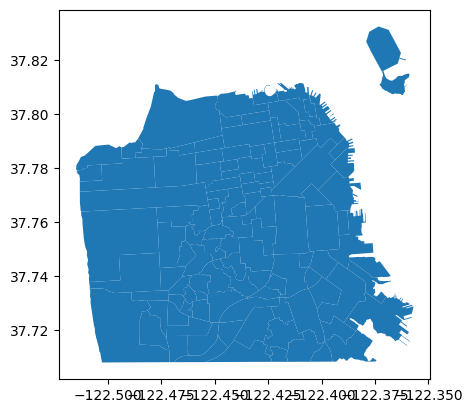

In [30]:
# read shapefile

sf_map = gpd.read_file('sf_neighborhood.zip')
sf_map.to_crs(epsg=4326).plot()

In [31]:
sf_map.head(10)

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,"POLYGON ((-122.49346 37.78352, -122.49373 37.7..."
1,None,Lake Street,"POLYGON ((-122.48715 37.78379, -122.48729 37.7..."
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,"POLYGON ((-122.47758 37.81099, -122.47712 37.8..."
3,None,Presidio Terrace,"POLYGON ((-122.47241 37.78735, -122.47100 37.7..."
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,"POLYGON ((-122.47263 37.78631, -122.46683 37.7..."
5,None,Sutro Heights,"POLYGON ((-122.50310 37.78130, -122.50309 37.7..."
6,None,Lincoln Park / Ft. Miley,"POLYGON ((-122.49333 37.78174, -122.50965 37.7..."
7,http://www.sfgate.com/neighborhoods/sf/outerri...,Outer Richmond,"POLYGON ((-122.51316 37.77501, -122.50267 37.7..."
8,http://www.sfgate.com/neighborhoods/sf/goldeng...,Golden Gate Park,"POLYGON ((-122.51314 37.77133, -122.51105 37.7..."
9,http://en.wikipedia.org/wiki/Neighborhoods_in_...,Presidio Heights,"POLYGON ((-122.45946 37.78950, -122.45424 37.7..."


## Map sf_trees data

In [ ]:
sf_trees.head()

In [ ]:
sf_trees.info()

In [32]:
# reformat the data set to only needed columns

sf_trees_map = sf_trees[['treeid','qaddress','latitude','longitude','location']].copy()
sf_trees_map

,treeid,qaddress,latitude,longitude,location
0,217365,707 Rockdale Dr,37.741209,-122.451285,"(37.74120925101712, -122.45128526411095)"
1,92771,11X Blanken Ave,37.712247,-122.401320,"(37.712246915438215, -122.40132023435935)"
2,23904,1600X Webster St,37.785380,-122.431304,"(37.78537959802679, -122.43130418097743)"
3,28646,1600X Webster St,37.785872,-122.431449,"(37.78587163716589, -122.43144931782685)"
4,229807,2560 Bryant St,37.753411,-122.409355,"(37.75341142310638, -122.40935530851043)"
...,...,...,...,...,...
196585,231304,365 Valley St,37.744210,-122.430394,"(37.74420986420245, -122.43039418027085)"
196586,269391,134 Aptos Ave,37.729555,-122.466675,"(37.7295545299999, -122.4666745393668)"
196587,267351,295 Yerba Buena Ave,37.733924,-122.459107,"(37.73392381107357, -122.45910719357623)"
196588,160078,420 Otsego Ave,37.722460,-122.441674,"(37.72245966606217, -122.44167446391262)"


In [33]:
# create geopandas dataframe for trees

geo_sf_trees = gpd.GeoDataFrame(
    sf_trees_map, geometry=gpd.points_from_xy(sf_trees_map.longitude, sf_trees_map.latitude)
)

In [34]:
# check the geopandas dataframe

geo_sf_trees.head()

,treeid,qaddress,latitude,longitude,location,geometry
0,217365,707 Rockdale Dr,37.741209,-122.451285,"(37.74120925101712, -122.45128526411095)",POINT (-122.45129 37.74121)
1,92771,11X Blanken Ave,37.712247,-122.401320,"(37.712246915438215, -122.40132023435935)",POINT (-122.40132 37.71225)
2,23904,1600X Webster St,37.785380,-122.431304,"(37.78537959802679, -122.43130418097743)",POINT (-122.43130 37.78538)
3,28646,1600X Webster St,37.785872,-122.431449,"(37.78587163716589, -122.43144931782685)",POINT (-122.43145 37.78587)
4,229807,2560 Bryant St,37.753411,-122.409355,"(37.75341142310638, -122.40935530851043)",POINT (-122.40936 37.75341)


<AxesSubplot: >

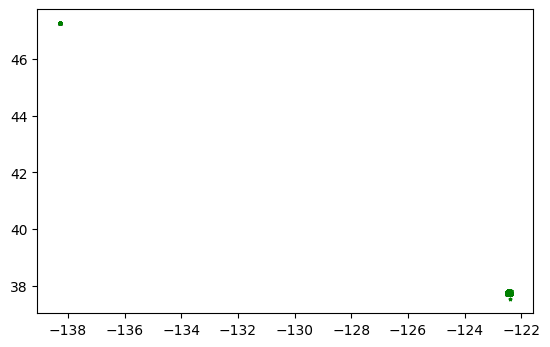

In [35]:
# plot geodataframe on the basemap
geo_sf_trees.plot(marker='*', color='green', markersize=5)

We can see some plots on the far left, which seem to be some mistakes when entering the geo data. I'll try get rid of those data points later. 

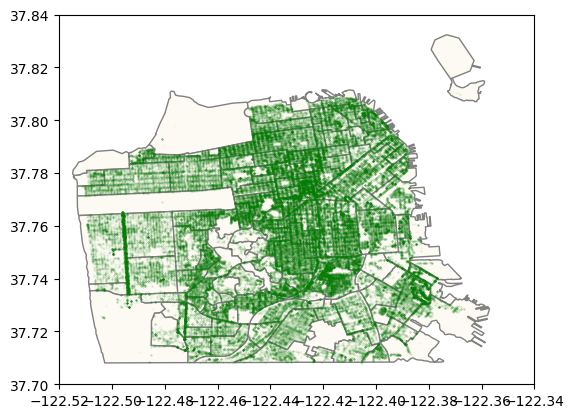

In [36]:
# plot the tree data on the city basemap

# basemap
base = sf_map.plot(color='#FCFAF2', edgecolor='grey')
# tree data
geo_sf_trees.plot(ax=base, marker = 'o', color='green', markersize = 0.1, alpha = 0.1)

# set limits to get rid of those data points that are not in sf earlier. 
plt.xlim(-122.52,-122.34)
plt.ylim(37.7,37.84)
plt.show()

## Map ginkgo trees

As mentioned earlier, I want to check where ginkgo trees are planted across the city.

In [37]:
# subset the ginkgo trees from the `sf_trees` dataframe

sf_trees.info()
species_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196590 entries, 0 to 196589
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   treeid                     196590 non-null  object        
 1   qlegalstatus               196533 non-null  object        
 2   qspecies                   196590 non-null  object        
 3   qaddress                   195097 non-null  object        
 4   siteorder                  194796 non-null  float64       
 5   qsiteinfo                  196590 non-null  object        
 6   planttype                  196590 non-null  object        
 7   qcaretaker                 196590 non-null  object        
 8   qcareassistant             24707 non-null   object        
 9   plantdate                  70878 non-null   datetime64[ns]
 10  dbh                        153021 non-null  float64       
 11  plotsize                   146229 non-null  object  

,species,treecount
0,unknown,13575
1,Platanus x hispanica :: Sycamore: London Plane,11739
2,Lophostemon confertus :: Brisbane Box,8904
3,Metrosideros excelsa :: New Zealand Xmas Tree,8850
4,Tristaniopsis laurina :: Swamp Myrtle,7448
...,...,...
569,Sorbus aucuparia :: European Mountain Ash Tr,1
570,Castanea dentata :: American Chestnut,1
571,Catalpa speciosa :: Northern Catalpa,1
572,Lagerstroemia x 'Tuscarora' :: Tuscarora Crape...,1


In [38]:
# subset `sf_trees` into a new dataframe with just the ginko trees

sf_trees_ginkgo = sf_trees[sf_trees['qspecies'].str.contains('ginkgo', case=False, na=False)].reset_index(drop=True)
sf_trees_ginkgo

,treeid,qlegalstatus,qspecies,qaddress,siteorder,qsiteinfo,planttype,qcaretaker,qcareassistant,plantdate,...,longitude,location,fire_prevention_districts,police_districts,supervisor_districts,zip_codes,neighborhoods_(old),_day,_month,_year
0,265843,Section 806 (d),Ginkgo biloba :: Maidenhair Tree,480 Warren Dr,8.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-06-30,...,-122.462404,"(37.758421243034476, -122.46240353646634)",1.0,5.0,4.0,63.0,12.0,2,6,2021
1,265844,Section 806 (d),Ginkgo biloba :: Maidenhair Tree,480 Warren Dr,9.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-06-30,...,-122.462404,"(37.758421243034476, -122.46240353646634)",1.0,5.0,4.0,63.0,12.0,2,6,2021
2,265842,Section 806 (d),Ginkgo biloba :: Maidenhair Tree,480 Warren Dr,7.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-06-30,...,-122.462404,"(37.758421243034476, -122.46240353646634)",1.0,5.0,4.0,63.0,12.0,2,6,2021
3,265845,Section 806 (d),Ginkgo biloba :: Maidenhair Tree,480 Warren Dr,10.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-06-30,...,-122.462404,"(37.758421243034476, -122.46240353646634)",1.0,5.0,4.0,63.0,12.0,2,6,2021
4,265840,Section 806 (d),Ginkgo biloba :: Maidenhair Tree,480 Warren Dr,5.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2021-06-30,...,-122.462404,"(37.758421243034476, -122.46240353646634)",1.0,5.0,4.0,63.0,12.0,2,6,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,259368,DPW Maintained,Ginkgo biloba 'Autumn Gold' :: Ginkgo: Autumn ...,1646 Revere Ave,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,FUF,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3572,262183,DPW Maintained,Ginkgo biloba 'Autumn Gold' :: Ginkgo: Autumn ...,550 Delta St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,FUF,2019-09-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,2019
3573,150279,DPW Maintained,Ginkgo biloba :: Maidenhair Tree,100 Wisconsin St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,2020-09-17,...,-122.399868,"(37.7658698369607, -122.399867741107)",14.0,3.0,8.0,28856.0,20.0,3,9,2020
3574,192429,DPW Maintained,Ginkgo biloba :: Maidenhair Tree,271 Clara St,1.0,Median : Cutout,Tree,Private,NaN,NaT,...,-122.403897,"(37.77820810106763, -122.4038971796154)",14.0,2.0,9.0,28856.0,34.0,<NA>,<NA>,<NA>


In [39]:
# check the specific species of those ginkgo trees

sf_trees_ginkgo['qspecies'].unique()

array(['Ginkgo biloba :: Maidenhair Tree',
       "Ginkgo biloba 'Autumn Gold' :: Ginkgo: Autumn Gold",
       "Ginkgo biloba 'Autumn Sentinel' :: Autumn Sentinel Ginkgo",
       "Ginkgo biloba 'Princeton Sentry' :: Princeton Sentry Maidenhair",
       "Ginkgo biloba 'Fairmont' :: Fairmont Ginkgo",
       "Ginkgo biloba 'Saratoga' :: Ginkgo: Saratoga"], dtype=object)

- There are 3576 ginkgo trees in SF with 6 different types.  
- Question: Where are these ginkgo trees located? Since ginkgo is a species of trees orginally native to China, will they be located near the Chinatown area? 

In [40]:
# create geopandas dataframe

geo_sf_ginkgo = gpd.GeoDataFrame(
    sf_trees_ginkgo, geometry=gpd.points_from_xy(sf_trees_ginkgo.longitude, sf_trees_ginkgo.latitude)
)

<AxesSubplot: >

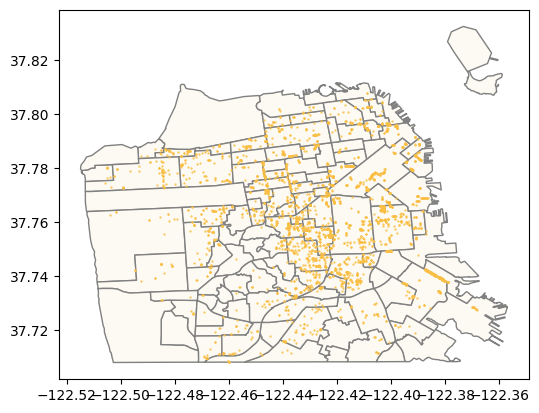

In [41]:
# mapping the ginkgo trees

base = sf_map.plot(color='#FCFAF2', edgecolor='grey')
geo_sf_ginkgo.plot(ax=base, marker = 'o', color='#F9BF45', markersize=0.3)

## Map the "One and Only"

We created the `sf_trees_only` dataframe in the species section. Now we can take a look at the trees that are the only one of their species in the city and map where they are. 

In [42]:
# create geopandas dataframe

geo_trees_only = gpd.GeoDataFrame(
    sf_trees_only, geometry=gpd.points_from_xy(sf_trees_only.longitude, sf_trees_only.latitude)
)

<AxesSubplot: >

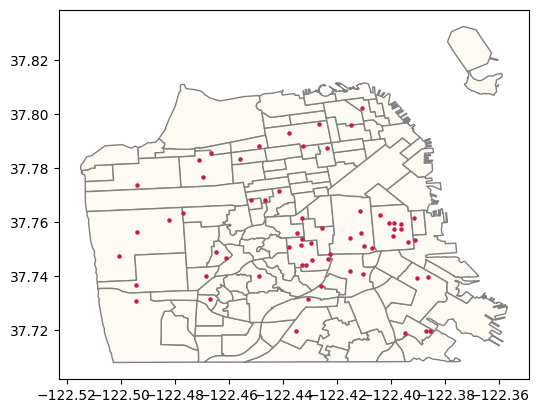

In [43]:
# mapping the only trees in the species

base = sf_map.plot(color='#FCFAF2', edgecolor='grey')
geo_trees_only.plot(ax=base, marker = 'o', color='#CB1B45', markersize=5)

## Interactivity of maps?

Tooltips? 